# Steps to Tackle a Time Series Problem (with Codes in Python)
Note: These are just the codes from article

## Loading and Handling TS in Pandas

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
%matplotlib inline
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 15, 6

In [14]:

#Note: aim is not to teach stock price forecasting. It's a very complex domain and I have almost no clue about it. Here I will demonstrate the various techniques which can be used for time-series forecasting

#csvFile = 'AirPassengers.csv'
csvFile = 'us-air-carrier-traffic-statistic.csv'

data = pd.read_csv(csvFile)


#print data.head()
#print '\n Data Types:'
#print data.dtypes

In [15]:
dateparse = lambda dates: pd.datetime.strptime(dates, '%Y-%m')
# dateparse('1962-01')
data = pd.read_csv(csvFile, parse_dates=['Month'], index_col='Month',date_parser=dateparse)

#print data.head()

In [16]:
#check datatype of index
#data.index

In [17]:
#convert to time series:
ts = data['#Passengers']
ts.head(10)

Month
1996-01-01    42023
1996-02-01    43769
1996-03-01    51888
1996-04-01    48605
1996-05-01    49818
1996-06-01    51668
1996-07-01    53258
1996-08-01    54820
1996-09-01    45590
1996-10-01    49625
Name: #Passengers, dtype: int64

### Indexing TS arrays:

In [18]:
#1. Specific the index as a string constant:
#ts['1949-01-01']

In [19]:
#2. Import the datetime library and use 'datetime' function:
from datetime import datetime
#ts[datetime(1949,1,1)]

#Get range:

In [20]:
#1. Specify the entire range:
#ts['1949-01-01':'1949-05-01']

In [21]:
#2. Use ':' if one of the indices is at ends:
#ts[:'1949-05-01']

Note: ends included here

In [22]:
#All rows of 1962:
#ts['1949']

Reading as datetime format:

# Checking for stationarity

## Plot the time-series

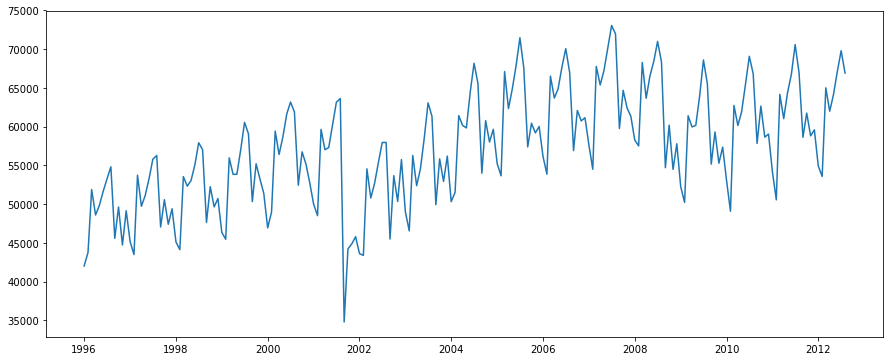

In [23]:
plt.plot(ts)

### Function for testing stationarity

In [24]:
from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries):
    
    #Determing rolling statistics
    rolmean = pd.rolling_mean(timeseries, window=12)
    rolstd = pd.rolling_std(timeseries, window=12)

    #Plot rolling statistics:
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
    #Perform Dickey-Fuller test:
    print 'Results of Dickey-Fuller Test:'
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print dfoutput

/home/ai/anaconda2/lib/python2.7/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


/home/ai/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:5: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=12,center=False).mean()
  """
/home/ai/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:6: FutureWarning: pd.rolling_std is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=12,center=False).std()
  


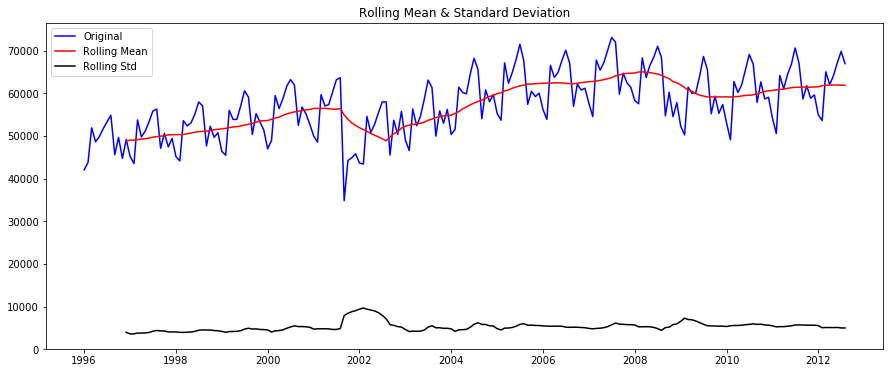

Results of Dickey-Fuller Test:
Test Statistic                  -1.771088
p-value                          0.394907
#Lags Used                      13.000000
Number of Observations Used    186.000000
Critical Value (5%)             -2.877208
Critical Value (1%)             -3.466005
Critical Value (10%)            -2.575122
dtype: float64


In [25]:
test_stationarity(ts)

# Making TS Stationary


## Estimating & Eliminating Trend


Month
1996-01-01    10.645972
1996-02-01    10.686681
1996-03-01    10.856843
1996-04-01    10.791482
1996-05-01    10.816132
1996-06-01    10.852594
1996-07-01    10.882903
1996-08-01    10.911810
1996-09-01    10.727444
1996-10-01    10.812250
Name: #Passengers, dtype: float64

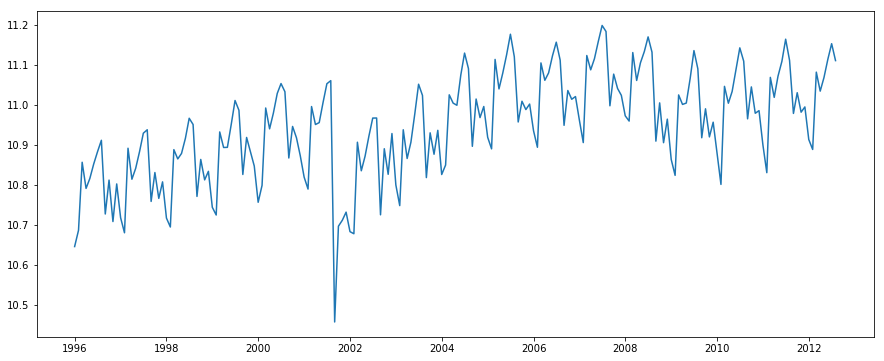

In [26]:
ts_log = np.log(ts)
plt.plot(ts_log)

ts_log.head(10)

## Smoothing:

### Moving average

/home/ai/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:1: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=12,center=False).mean()
  """Entry point for launching an IPython kernel.


Month
1996-01-01          NaN
1996-02-01          NaN
1996-03-01          NaN
1996-04-01          NaN
1996-05-01          NaN
1996-06-01          NaN
1996-07-01          NaN
1996-08-01          NaN
1996-09-01          NaN
1996-10-01          NaN
1996-11-01          NaN
1996-12-01    10.791275
1997-01-01    10.797304
1997-02-01    10.796788
1997-03-01    10.799712
1997-04-01    10.801624
1997-05-01    10.803750
1997-06-01    10.806340
1997-07-01    10.810225
1997-08-01    10.812417
Name: #Passengers, dtype: float64

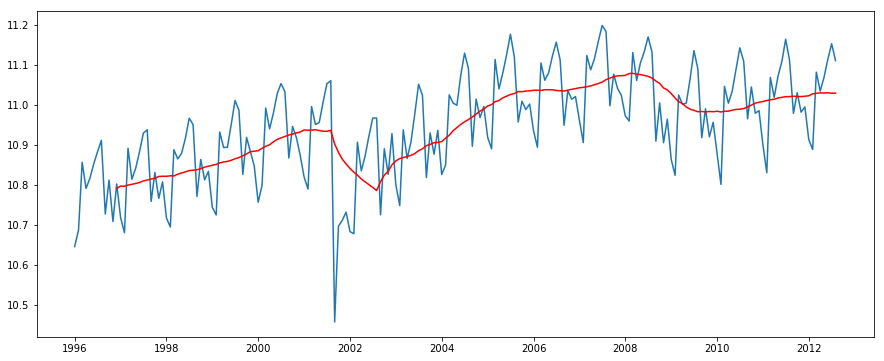

In [27]:
moving_avg = pd.rolling_mean(ts_log,12)
plt.plot(ts_log)
plt.plot(moving_avg, color='red')
moving_avg.head(20)

In [28]:
ts_log_moving_avg_diff = ts_log - moving_avg
ts_log_moving_avg_diff.head(15)

Month
1996-01-01         NaN
1996-02-01         NaN
1996-03-01         NaN
1996-04-01         NaN
1996-05-01         NaN
1996-06-01         NaN
1996-07-01         NaN
1996-08-01         NaN
1996-09-01         NaN
1996-10-01         NaN
1996-11-01         NaN
1996-12-01    0.011357
1997-01-01   -0.078983
1997-02-01   -0.116295
1997-03-01    0.092219
Name: #Passengers, dtype: float64

In [29]:
ts_log_moving_avg_diff.dropna(inplace=True)
ts_log_moving_avg_diff.head()

Month
1996-12-01    0.011357
1997-01-01   -0.078983
1997-02-01   -0.116295
1997-03-01    0.092219
1997-04-01    0.012800
Name: #Passengers, dtype: float64

/home/ai/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:5: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=12,center=False).mean()
  """
/home/ai/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:6: FutureWarning: pd.rolling_std is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=12,center=False).std()
  


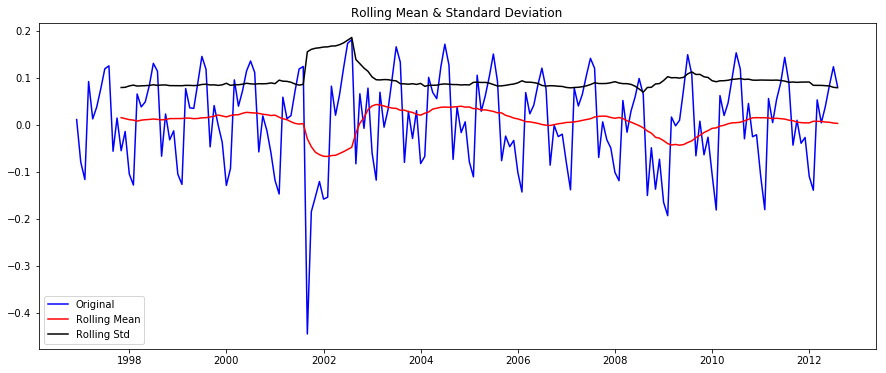

Results of Dickey-Fuller Test:
Test Statistic                  -3.717127
p-value                          0.003879
#Lags Used                      14.000000
Number of Observations Used    174.000000
Critical Value (5%)             -2.878298
Critical Value (1%)             -3.468502
Critical Value (10%)            -2.575704
dtype: float64


In [30]:
test_stationarity(ts_log_moving_avg_diff)

### Exponentially Weighted Moving Average

/home/ai/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:1: FutureWarning: pd.ewm_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.ewm(halflife=12,ignore_na=False,min_periods=0,adjust=True).mean()
  """Entry point for launching an IPython kernel.


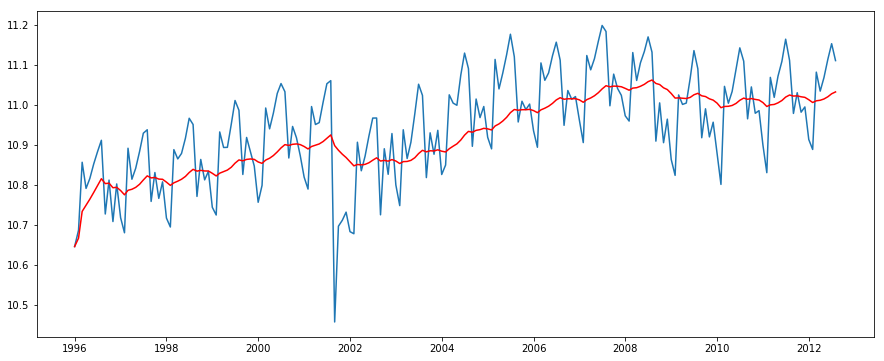

In [31]:
expwighted_avg = pd.ewma(ts_log, halflife=12)
plt.plot(ts_log)
plt.plot(expwighted_avg, color='red')
# expwighted_avg.plot(style='k--')

/home/ai/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:5: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=12,center=False).mean()
  """
/home/ai/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:6: FutureWarning: pd.rolling_std is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=12,center=False).std()
  


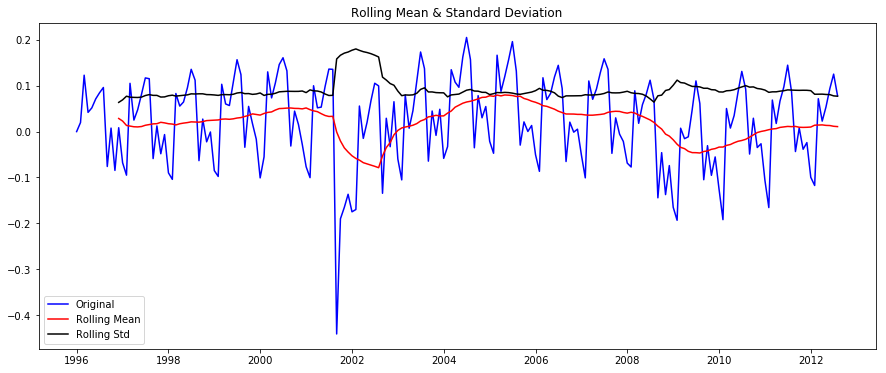

Results of Dickey-Fuller Test:
Test Statistic                  -2.869383
p-value                          0.049026
#Lags Used                      14.000000
Number of Observations Used    185.000000
Critical Value (5%)             -2.877293
Critical Value (1%)             -3.466201
Critical Value (10%)            -2.575168
dtype: float64


In [32]:
ts_log_ewma_diff = ts_log - expwighted_avg
test_stationarity(ts_log_ewma_diff)

## Eliminating Trend and Seasonality

### Differencing:

Month
1996-01-01         NaN
1996-02-01    0.040709
1996-03-01    0.170162
1996-04-01   -0.065361
1996-05-01    0.024650
1996-06-01    0.036462
1996-07-01    0.030309
1996-08-01    0.028907
1996-09-01   -0.184367
1996-10-01    0.084806
Name: #Passengers, dtype: float64

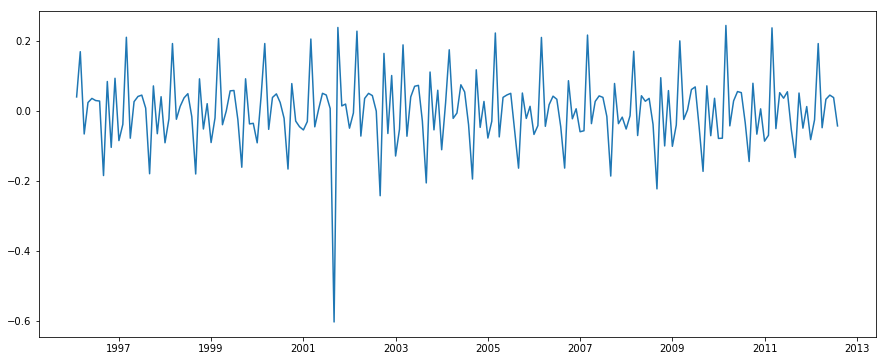

In [33]:
#Take first difference:
ts_log_diff = ts_log - ts_log.shift()
plt.plot(ts_log_diff)
ts_log_diff.head(10)

/home/ai/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:5: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=12,center=False).mean()
  """
/home/ai/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:6: FutureWarning: pd.rolling_std is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=12,center=False).std()
  


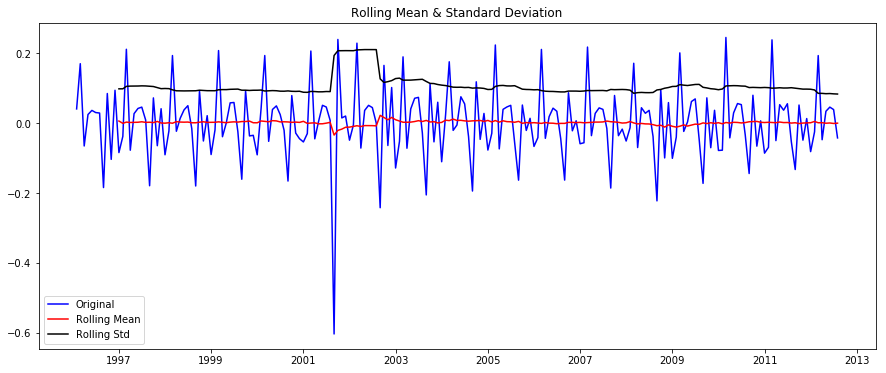

Results of Dickey-Fuller Test:
Test Statistic                  -4.057405
p-value                          0.001138
#Lags Used                      12.000000
Number of Observations Used    186.000000
Critical Value (5%)             -2.877208
Critical Value (1%)             -3.466005
Critical Value (10%)            -2.575122
dtype: float64


In [34]:
ts_log_diff.dropna(inplace=True)
test_stationarity(ts_log_diff)

### Decomposition:

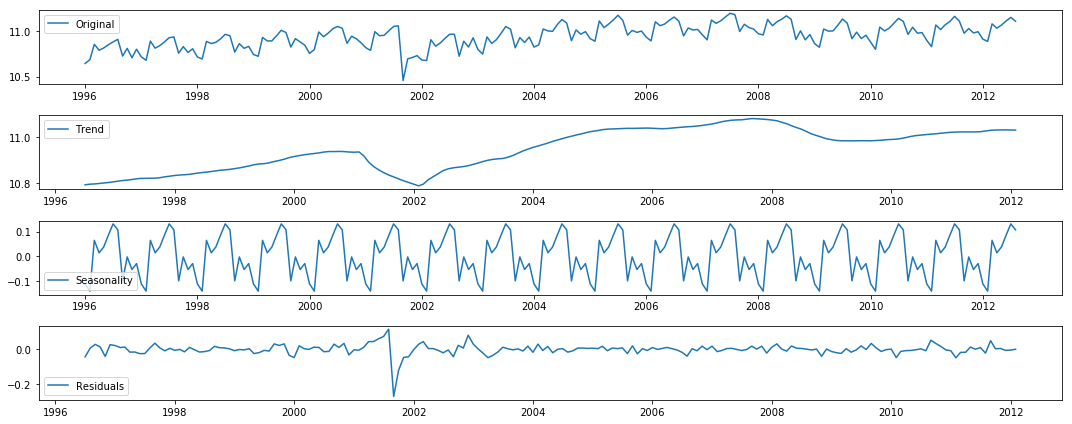

In [35]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(ts_log)

trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

plt.subplot(411)
plt.plot(ts_log, label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal,label='Seasonality')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual, label='Residuals')
plt.legend(loc='best')
plt.tight_layout()

/home/ai/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:5: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=12,center=False).mean()
  """
/home/ai/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:6: FutureWarning: pd.rolling_std is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=12,center=False).std()
  


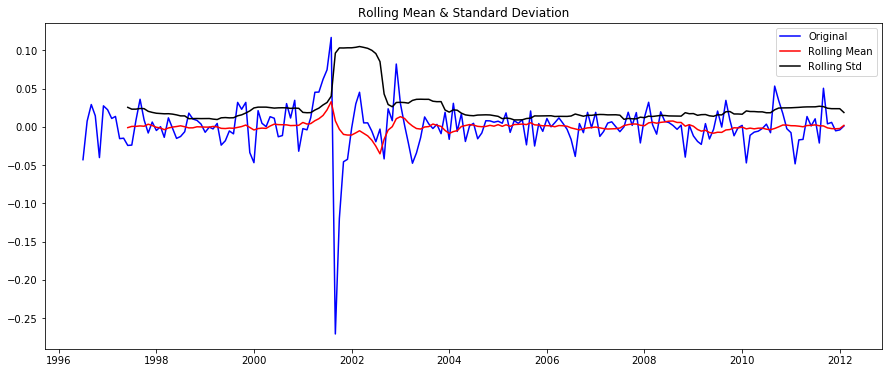

Results of Dickey-Fuller Test:
Test Statistic                -5.673240e+00
p-value                        8.823311e-07
#Lags Used                     1.400000e+01
Number of Observations Used    1.730000e+02
Critical Value (5%)           -2.878396e+00
Critical Value (1%)           -3.468726e+00
Critical Value (10%)          -2.575756e+00
dtype: float64


In [36]:
ts_log_decompose = residual
ts_log_decompose.dropna(inplace=True)
test_stationarity(ts_log_decompose)

# Final Forecasting

In [37]:
from statsmodels.tsa.arima_model import ARIMA

### ACF & PACF Plots

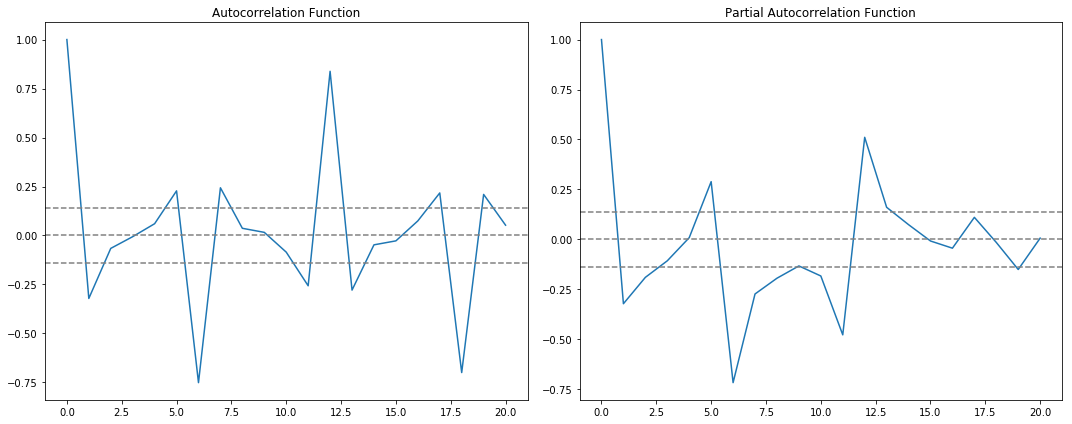

In [38]:
#ACF and PACF plots:
from statsmodels.tsa.stattools import acf, pacf  

lag_acf = acf(ts_log_diff, nlags=20)
lag_pacf = pacf(ts_log_diff, nlags=20, method='ols')

#Plot ACF:    
plt.subplot(121)    
plt.plot(lag_acf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(ts_log_diff)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(ts_log_diff)),linestyle='--',color='gray')
plt.title('Autocorrelation Function')

#Plot PACF:
plt.subplot(122)
plt.plot(lag_pacf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(ts_log_diff)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(ts_log_diff)),linestyle='--',color='gray')
plt.title('Partial Autocorrelation Function')
plt.tight_layout()

### AR Model:

/home/ai/anaconda2/lib/python2.7/site-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


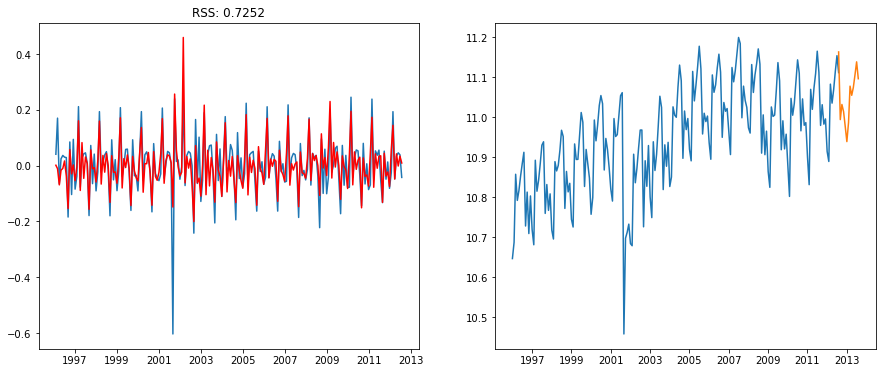

In [39]:
#MA model:
model = ARIMA(ts_log, order=(10, 1, 0))  
results_AR = model.fit(disp=-1)  
plt.subplot(121)  
plt.plot(ts_log_diff)
plt.plot(results_AR.fittedvalues, color='red')
plt.title('RSS: %.4f'% sum((results_AR.fittedvalues-ts_log_diff)**2))

predict_AR = results_AR.predict(start='2012-08-01',end='2013-08-01',typ='levels')

plt.subplot(122)  
plt.plot(ts_log)
plt.plot(predict_AR)




### MA Model

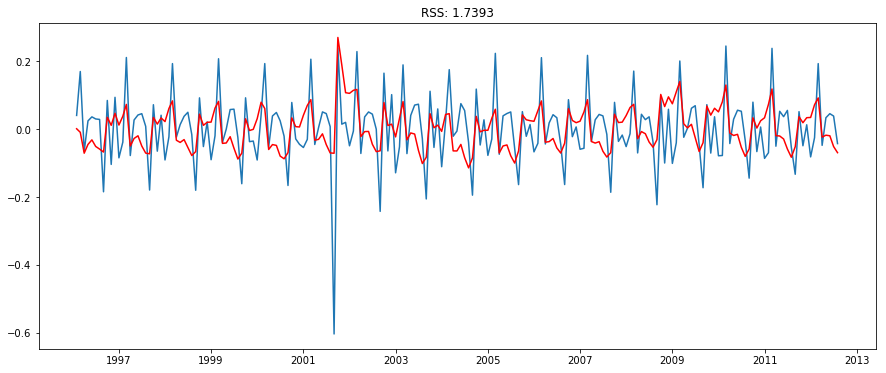

In [40]:
model = ARIMA(ts_log, order=(0, 1, 2))  
results_MA = model.fit(disp=-1)  
plt.plot(ts_log_diff)
plt.plot(results_MA.fittedvalues, color='red')
plt.title('RSS: %.4f'% sum((results_MA.fittedvalues-ts_log_diff)**2))

### ARIMA Model:

199
199
200


/home/ai/anaconda2/lib/python2.7/site-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


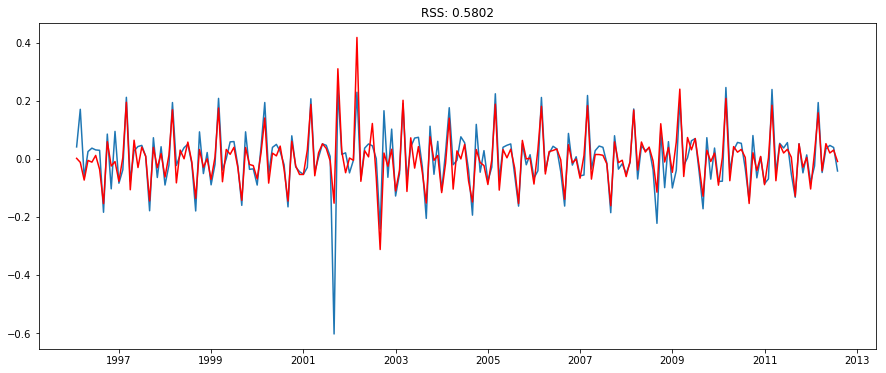

In [41]:
model = ARIMA(ts_log, order=(10, 1, 2))  
results_ARIMA = model.fit(disp=-1)  
plt.plot(ts_log_diff)
plt.plot(results_ARIMA.fittedvalues, color='red')
print len(results_ARIMA.fittedvalues)
print len(ts_log_diff)
print len(ts_log)
plt.title('RSS: %.4f'% sum((results_ARIMA.fittedvalues-ts_log_diff)**2))

# Model Predict

Month
1996-01-01    10.645972
1996-02-01    10.686681
1996-03-01    10.856843
1996-04-01    10.791482
1996-05-01    10.816132
Name: #Passengers, dtype: float64
Month
1996-02-01    0.040709
1996-03-01    0.170162
1996-04-01   -0.065361
1996-05-01    0.024650
1996-06-01    0.036462
Name: #Passengers, dtype: float64
180
2011-01-01 00:00:00 10.9000486585

 predict_start, predict_end
2011-01-01 00:00:00 2015-08-01


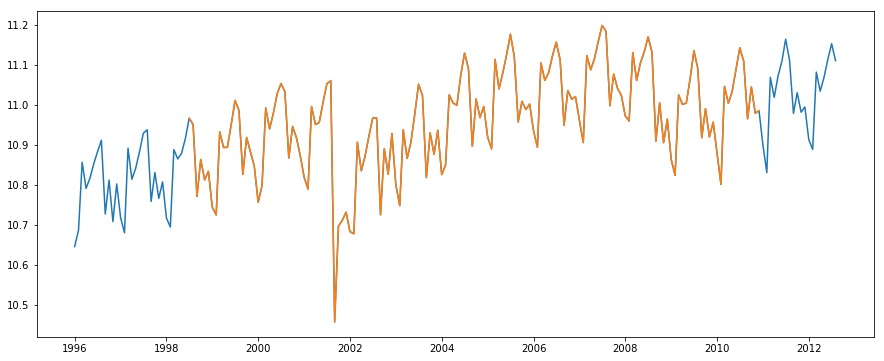

In [215]:

print(ts_log[0:5])
print(ts_log_diff[0:5])

scope_len=150
pos_start=30
pos_end=pos_start+scope_len

print pos_end 
print ts_log.index[pos_end] , ts_log[pos_end]

#predict_start='2012-08-01'
predict_start=ts_log.index[pos_end]
predict_end='2015-08-01'

print '\n predict_start, predict_end'
print predict_start, predict_end

ts_log_new = ts_log[pos_start:pos_end]
ts_log_diff_new = ts_log_diff[pos_start:pos_end-1]

#print '\n ts_log_new' ,ts_log_new
#print '\n ts_log_diff_new', ts_log_diff_new

plt.plot(ts_log)
plt.plot(ts_log_new)

/home/ai/anaconda2/lib/python2.7/site-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


                             ARIMA Model Results                              
Dep. Variable:          D.#Passengers   No. Observations:                  149
Model:                ARIMA(10, 1, 2)   Log Likelihood                 211.470
Method:                       css-mle   S.D. of innovations              0.057
Date:                Wed, 06 Sep 2017   AIC                           -394.940
Time:                        08:08:01   BIC                           -352.885
Sample:                    08-01-1998   HQIC                          -377.854
                         - 12-01-2010                                         
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    0.0011      0.001      0.926      0.356      -0.001       0.003
ar.L1.D.#Passengers      0.1740      0.177      0.982      0.328      -0.173       0.521
ar.L2.D.#Pas

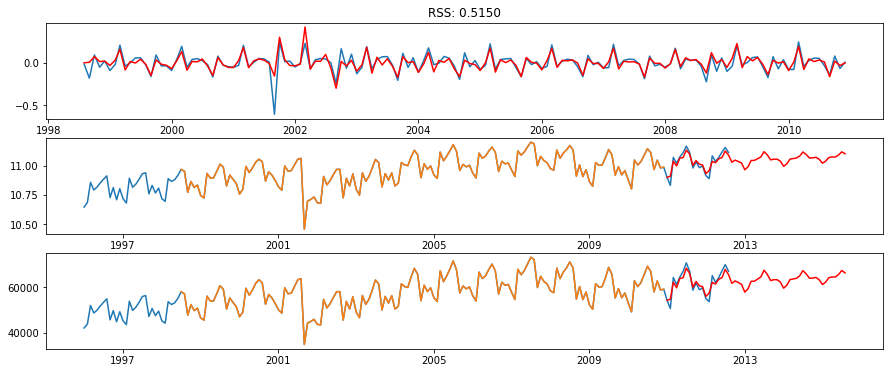

In [216]:
model = ARIMA(ts_log_new, order=(10, 1, 2))  
results_ARIMA = model.fit(disp=-1)  
print results_ARIMA.summary() 
plt.subplot(311)  
plt.plot(ts_log_diff_new)
plt.plot(results_ARIMA.fittedvalues, color='red')
plt.title('RSS: %.4f'% sum((results_ARIMA.fittedvalues-ts_log_diff_new)**2))

predict_ARIMA = results_ARIMA.predict(start=predict_start,end=predict_end,typ='levels')

plt.subplot(312)  
plt.plot(ts_log)
plt.plot(ts_log_new)
plt.plot(predict_ARIMA,color='red')

plt.subplot(313)  
plt.plot(ts)
plt.plot(np.exp(ts_log_new))
plt.plot(np.exp(predict_ARIMA),color='red')


### Convert to original scale:

In [44]:
predictions_ARIMA_diff = pd.Series(results_ARIMA.fittedvalues, copy=True)
print predictions_ARIMA_diff.head()

Month
1996-02-01    0.001345
1996-03-01   -0.012473
1996-04-01   -0.073543
1996-05-01   -0.005821
1996-06-01   -0.011827
dtype: float64


In [45]:
predictions_ARIMA_diff_cumsum = predictions_ARIMA_diff.cumsum()
print predictions_ARIMA_diff_cumsum.head()

Month
1996-02-01    0.001345
1996-03-01   -0.011128
1996-04-01   -0.084671
1996-05-01   -0.090491
1996-06-01   -0.102318
dtype: float64


In [46]:
predictions_ARIMA_log = pd.Series(ts_log.ix[0], index=ts_log.index)
predictions_ARIMA_log = predictions_ARIMA_log.add(predictions_ARIMA_diff_cumsum,fill_value=0)
predictions_ARIMA_log.head()

/home/ai/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:1: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate_ix
  """Entry point for launching an IPython kernel.


Month
1996-01-01    10.645972
1996-02-01    10.647318
1996-03-01    10.634845
1996-04-01    10.561302
1996-05-01    10.555481
dtype: float64

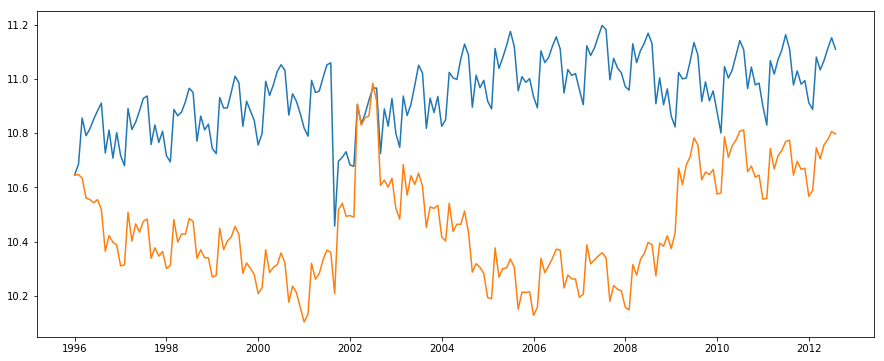

In [47]:
plt.plot(ts_log)
plt.plot(predictions_ARIMA_log)

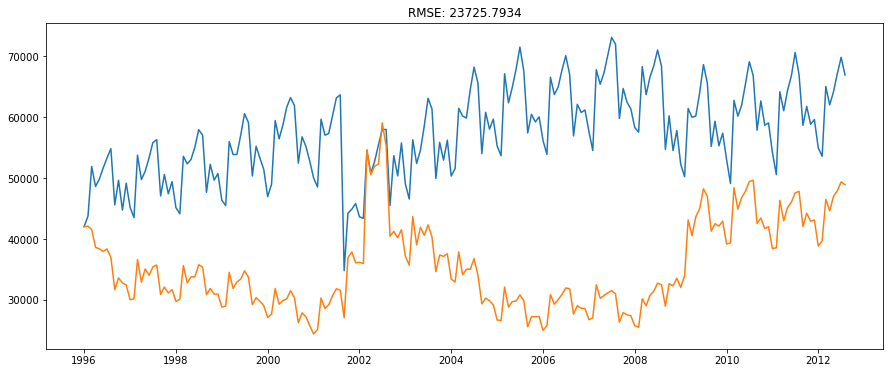

In [48]:
predictions_ARIMA = np.exp(predictions_ARIMA_log)
plt.plot(ts)
plt.plot(predictions_ARIMA)
plt.title('RMSE: %.4f'% np.sqrt(sum((predictions_ARIMA-ts)**2)/len(ts)))

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
